In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import torch

In [2]:
def summary_test(file_path):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(8)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, 8):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])
    
    test_loss = tmp/8
    test_acc = tmp2/8
    
    tmp = np.array(history[0]["diff_param"])
    for j in range(1, 8):
        tmp += np.array(history[j]["diff_param"])
    diff_param = tmp/8

    
    return test_loss, test_acc, diff_param


def summary_val(file_path):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(8)]
    tmp = np.array(history[0]["val_loss"])
    tmp2 = np.array(history[0]["val_acc"])
    for j in range(1, 8):
        tmp += np.array(history[j]["val_loss"])
        tmp2 += np.array(history[j]["val_acc"])
    
    test_loss = tmp/8
    test_acc = tmp2/8
    
    tmp = np.array(history[0]["diff_param"])
    for j in range(1, 8):
        tmp += np.array(history[j]["diff_param"])
    diff_param = tmp/8

    
    return test_loss, test_acc, diff_param


def summary_train(file_path):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(8)]
    tmp = np.array(history[0]["train_loss"])
    tmp2 = np.array(history[0]["train_acc"])
    for j in range(1, 8):
        tmp += np.array(history[j]["train_loss"])
        tmp2 += np.array(history[j]["train_acc"])
    
    test_loss = tmp/8
    test_acc = tmp2/8
    
    tmp = np.array(history[0]["diff_param"])
    for j in range(1, 8):
        tmp += np.array(history[j]["diff_param"])
    diff_param = tmp/8

    
    return test_loss, test_acc, diff_param

def summary_all_train(file_path):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(8)]
    tmp = np.array(history[0]["all_train_loss"])
    tmp2 = np.array(history[0]["all_train_acc"])
    for j in range(1, 8):
        tmp += np.array(history[j]["all_train_loss"])
        tmp2 += np.array(history[j]["all_train_acc"])
    
    test_loss = tmp/8
    test_acc = tmp2/8
    
    tmp = np.array(history[0]["diff_param"])
    for j in range(1, 8):
        tmp += np.array(history[j]["diff_param"])
    diff_param = tmp/8

    
    return test_loss, test_acc, diff_param

def summary_baseline(file_path):
    
    history = pickle.load(open(file_path + "/node.pk", "rb"))
    
    test_loss = np.array(history["test_loss"])
    test_acc = np.array(history["test_acc"])
    
    return test_loss, test_acc


In [3]:
def search_best_lr(path, method, n_class, lr_list):
    
    best_acc = -1
    best_lr = -1
    
    for lr in lr_list:
        _, acc, _ = summary_val(path + "/class_" + str(n_class) + "/" + method + "_lr_" + str(lr))
            
        #print(lr, acc[-1])
        if best_acc < acc[-1]:
            best_acc = acc[-1]
            best_lr = lr
    return best_lr

In [4]:
def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

DSGDm: best lr 0.005
	 35.6
QG-DSGDm: best lr 0.005
	 49.4
DecentLaM: best lr 0.005
	 54.9
Momentum Tracking: best lr 0.001
	 66.8


Text(0.5, 1.0, '4-class')

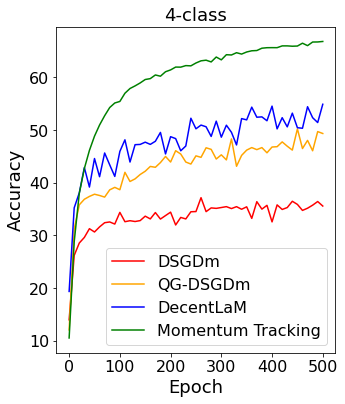

In [19]:
n_class = 4
colors = ["red", "orange", "blue", "green", "black", "navy"]
methods = ["dsgdm", "qg_dsgdm", "decentlam", "momentum_tracking"]
labels = ["DSGDm", "QG-DSGDm", "DecentLaM", "Momentum Tracking"]
results = []

plt.figure(figsize=(5,6))

for method, label, color in zip(methods, labels, colors):
        
    acc_list = []

    for seed in [0, ]:
        lr = search_best_lr("../results/cifar_lenet/" + str(seed), method, n_class, [0.005,0.001,0.0005])
        _, acc, __ = summary_test("../results/cifar_lenet/" + str(seed) + "/class_" + str(n_class) + "/" + method + "_lr_" + str(lr))
        acc_list.append(acc)
        
    avg, _ = average_acc(acc_list)
    print(f"{label}: best lr {lr}\n\t {avg[-1]:.1f}")

    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"{n_class}-class", fontsize=18)

QG-DSGDm: best lr 0.01
	 77.2
DecentLaM: best lr 0.01
	 85.5
Momentum Tracking: best lr 0.01
	 88.0


Text(0.5, 1.0, '2-class')

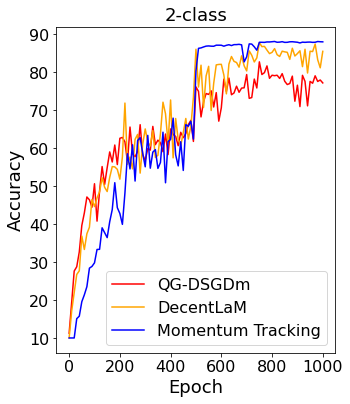

In [24]:
n_class = 2
colors = ["red", "orange", "blue", "green", "black", "navy"]
methods = ["qg_dsgdm", "decentlam", "momentum_tracking"]
labels = ["QG-DSGDm", "DecentLaM", "Momentum Tracking"]
results = []

plt.figure(figsize=(5,6))

for method, label, color in zip(methods, labels, colors):
        
    acc_list = []

    for seed in [0, ]:
        lr = search_best_lr("../results/cifar_vgg/" + str(seed), method, n_class, [0.01])
        _, acc, __ = summary_test("../results/cifar_vgg/" + str(seed) + "/class_" + str(n_class) + "/" + method + "_lr_" + str(lr))
        acc_list.append(acc)
        
    avg, _ = average_acc(acc_list)
    print(f"{label}: best lr {lr}\n\t {avg[-1]:.1f}")

    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"{n_class}-class", fontsize=18)